In [33]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from glob import glob

In [34]:
files = glob('weather_data_input/weather_data_set_*')
print(files)

['weather_data_input/weather_data_set_1900', 'weather_data_input/weather_data_set_1901']


In [35]:
dfs = []
for file in files:
    df = pd.read_csv(file, sep='|', header=None, names=['station', 'year', 'datemonth', 'hourminute', 'temperature'])
    dfs.append(df)

In [36]:
dfs

[   station  year  datemonth  hourminute  temperature
 0     3300  1900        101         300           23
 1     3300  1900        101         400           24
 2     3300  1900        301         200           26
 3     3300  1900        305         230           24
 4     3300  1900        312         100           30
 5     3300  1900        412         300           29
 6     3301  1900        312         100           34
 7     3301  1900        412         400           23,
     station  year  datemonth  hourminute  temperature
 0      3300  1901        101         400         24.0
 1      3300  1901        101         500         45.0
 2      3300  1901        301         300         40.0
 3      3300  1901        312         200         34.0
 4      3300  1901        412         100         32.0
 5      3301  1901        312         130         22.0
 6      3301  1901        412        1500         21.0
 7      3302  1901        102         400         20.0
 8      3302  1901

In [37]:
data = pd.concat(dfs, ignore_index=True)
data

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [38]:
data['temperature'].unique()

array([23., 24., 26., 30., 29., 34., 45., 40., 32., 22., 21., 20., 35.,
       19., nan])

In [39]:
# Prepare NaN values for the temperature column
data['temperature'] = data['temperature'].ffill()
data

,station,year,datemonth,hourminute,temperature
0,3300,1900,101,300,23.0
1,3300,1900,101,400,24.0
2,3300,1900,301,200,26.0
3,3300,1900,305,230,24.0
4,3300,1900,312,100,30.0
5,3300,1900,412,300,29.0
6,3301,1900,312,100,34.0
7,3301,1900,412,400,23.0
8,3300,1901,101,400,24.0
9,3300,1901,101,500,45.0


In [40]:
data['temperature'].unique()

array([23., 24., 26., 30., 29., 34., 45., 40., 32., 22., 21., 20., 35.,
       19.])

In [41]:
data['year'].unique()

array([1900, 1901])

In [43]:
data['year'].value_counts()

1901    14
1900     8
Name: year, dtype: int64

# Max temperature that was recorded on a yearly basis

In [44]:
d1 = data[['year', 'temperature']]
d1

,year,temperature
0,1900,23.0
1,1900,24.0
2,1900,26.0
3,1900,24.0
4,1900,30.0
5,1900,29.0
6,1900,34.0
7,1900,23.0
8,1901,24.0
9,1901,45.0


In [47]:
d2 = d1.groupby('year')
d2

In [49]:
d3 = d2.max()
d3

,temperature
year,
1900,34.0
1901,45.0


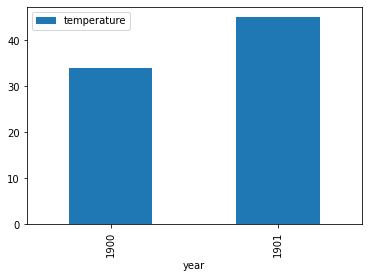

In [51]:
d3.plot(kind='bar')
# plt.show()
plt.savefig('max_temperature_yearly.jpg', format='jpg')